<a href="https://colab.research.google.com/github/Bassamelkoussa/Accident-Severity-Classification/blob/main/Attention_Technical_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Attention is all you need**


# 1-Motivation

Attention is a famous method in modern deep learning models. The Google paper named "Attention is All You Need" (2) had been introduced in 2017, since that time it has been cited by 39,332 academic papers as per google scholar. It explains about transformer architectures based on attention mechanisms, marking one of the most advancement in Machine Learning (ML) technology. Attention-based architectures have been applied successfully in diverse Machine Leanring (ML) applications such as natural language processing (NLP), speech recognition, and most recently in computer vision. The attention mechanism in this paper aims to improve speed and results compared to Recurrent Neural Networks (RNN) and long short-term memory (LSTM) that are widely used in natural language processing.

# 2- Introduction to Sequence to sequence learning



Sequence to Sequence (Seq2Seq) are deep learning models that have achieved a lot of success in tasks like machine translation, text summarization, and image captioning. This model had been utilised mainly before the introduction of this paper. The following diagram represents the Sequence to sequence process flow: <br><br>


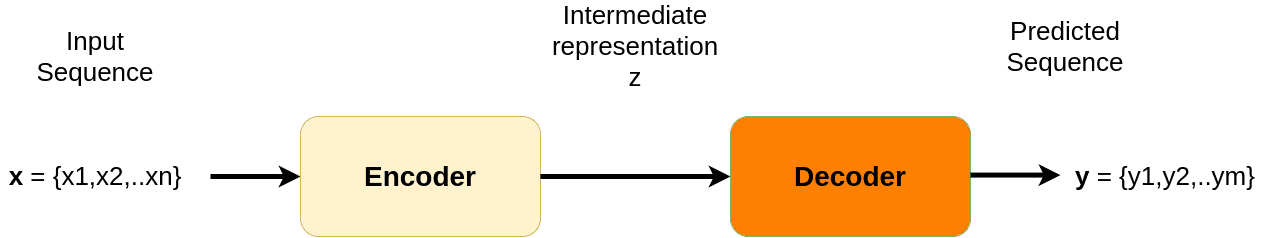

A Seq2Seq model takes an input sequence of items such as letters and words, and transform it to an output sequence of items (5). For instance, predicting whether a customer feedback is positive or negative. In this example, the input is a sequence of words available in the comment and output is a single number between 0 and 1. The main challenge is to generate reasoning within the sequence of words, use knowledge about previous words in the sentence to inform later ones.

The Seq2Seq NMT model can be explained as an autoregressive language model, and the decoder finds the target sequence  most likely given the input sequence. Mathematically, it can be formulated as follows:

$$
P(y|x) = P(y_1|x) P(y_2|y_1,x) \dots P(y_T|y_1, \dots, y_{T-1}, x)
$$

where $x$ is the input sequence and $y$ is the output sequence.

# 3- Recurrent Neural Networks

Recurrent Neural Network (RNN) has been developed to solve such challenge. It is a natural generalization of feedforward neural networks to sequences due to the available loops in such networks, allowing information to persist. A recurrent neural network is represented in below diagram as multiple copies of the same network, each passing a message to a successor:


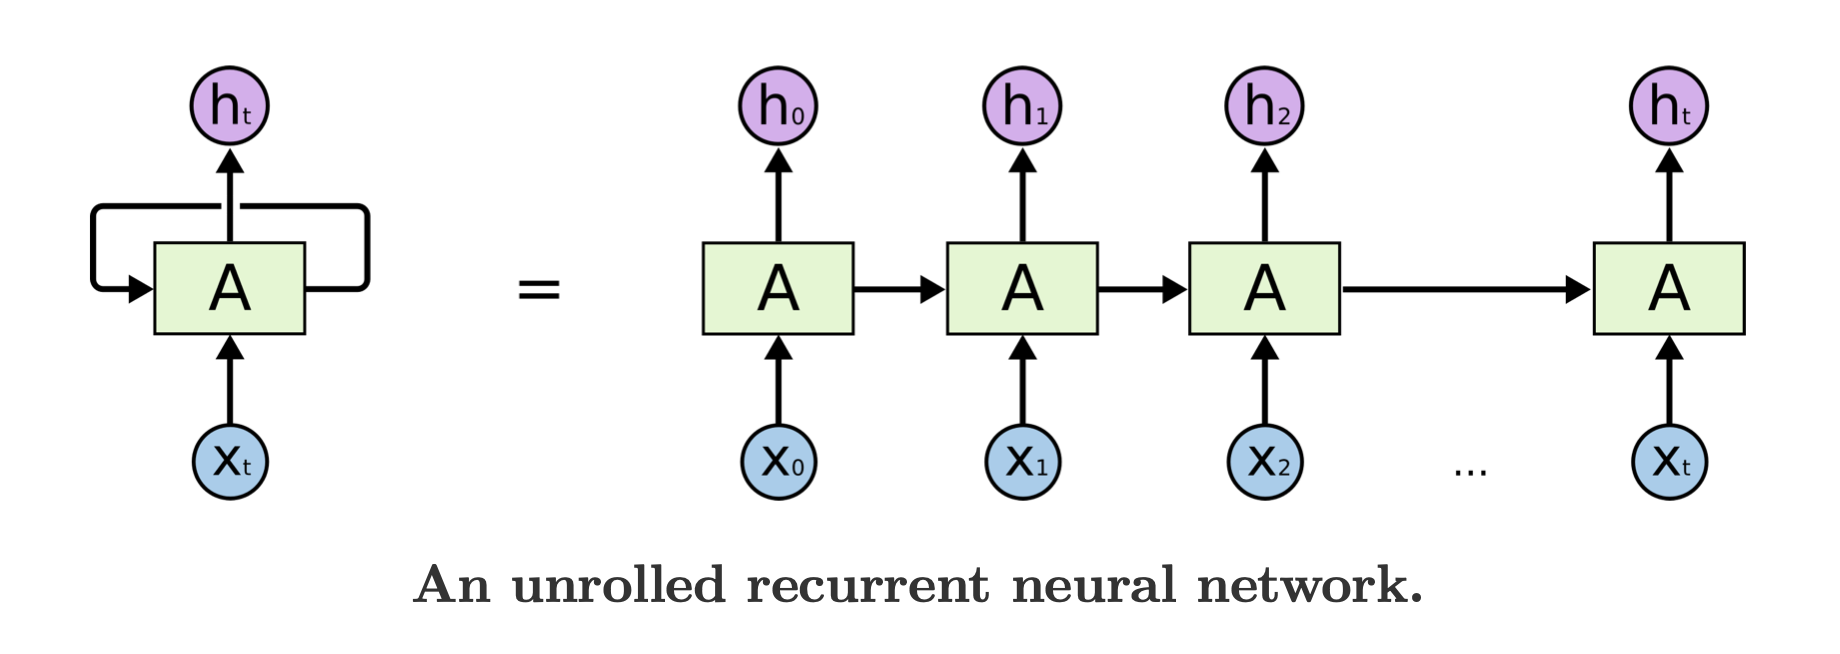

At each time-step, for any input X = (x₀, x₁, x₂, … xₜ) with a variable number of features, an RNN cell takes an item/token xₜ as input and produces an output hₜ while transmitting some information to the next time-step. These outputs can be used according to the problem at hand.

Recurrent Neural Networks are slow and can’t deal with a long sequence very well. Since they work only one word at a time it leads to problems like vanishing or exploding gradients, an issue with RNN’s known as short-term memory. As that gap grows, RNNs become unable to learn to connect the information as shown in below diagram (6):

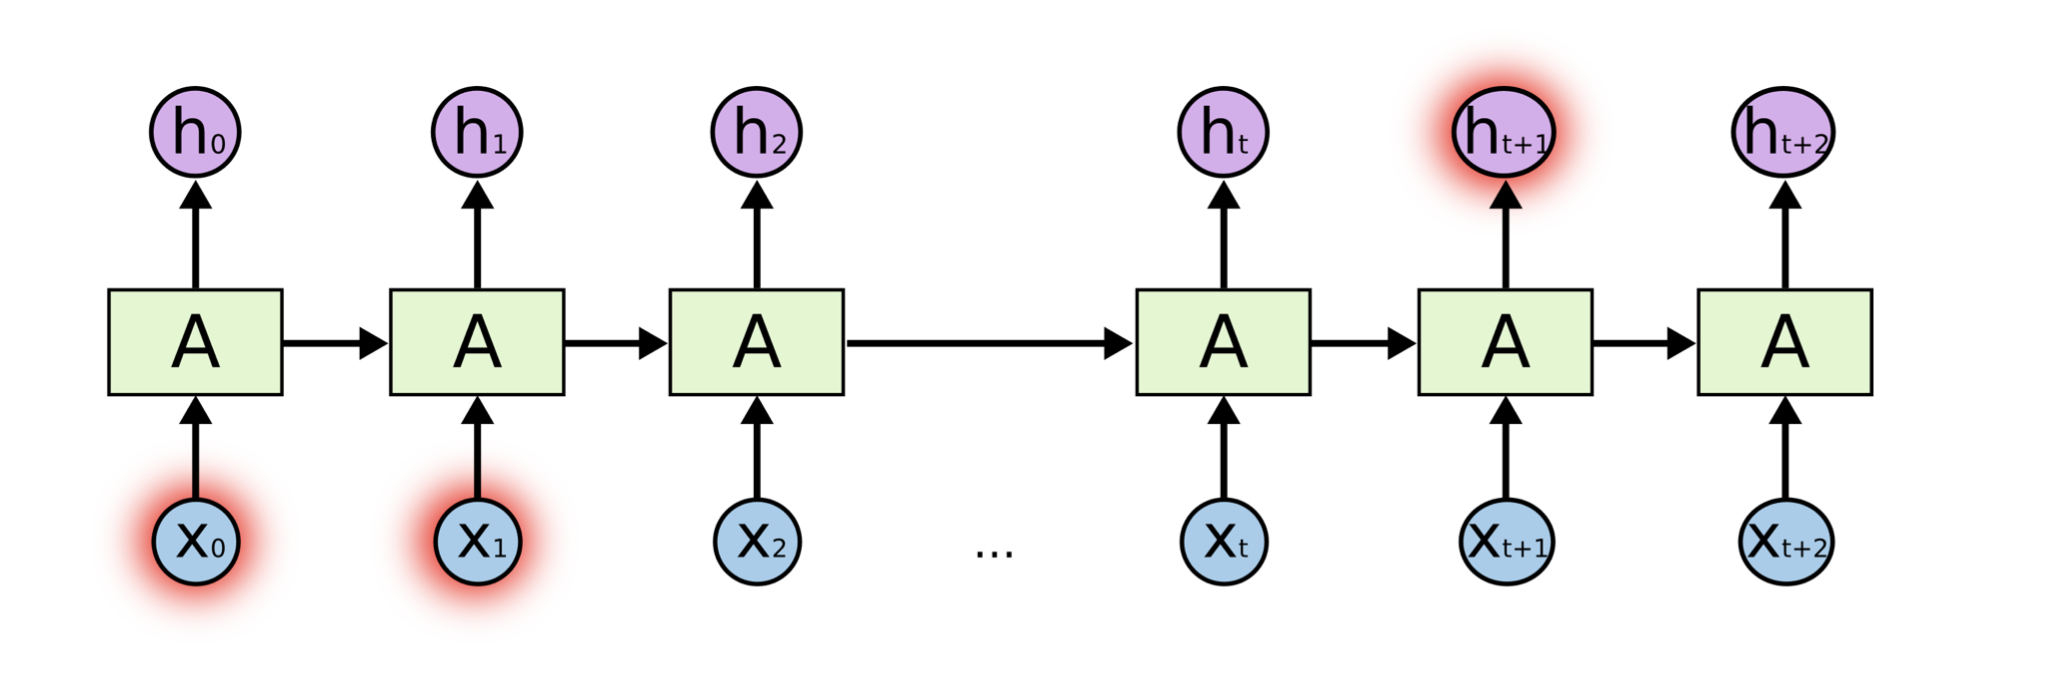

# 4- LSTM Networks

Long Short Term Memory networks (LSTMs) are a special kind of RNN, capable of learning long-term dependencies, using mechanisms called “gates”. Remembering information for long periods of time is the differentiation element of this model compared to RNN, due to an upgraded repeating module structure as shown in following digrams (6):

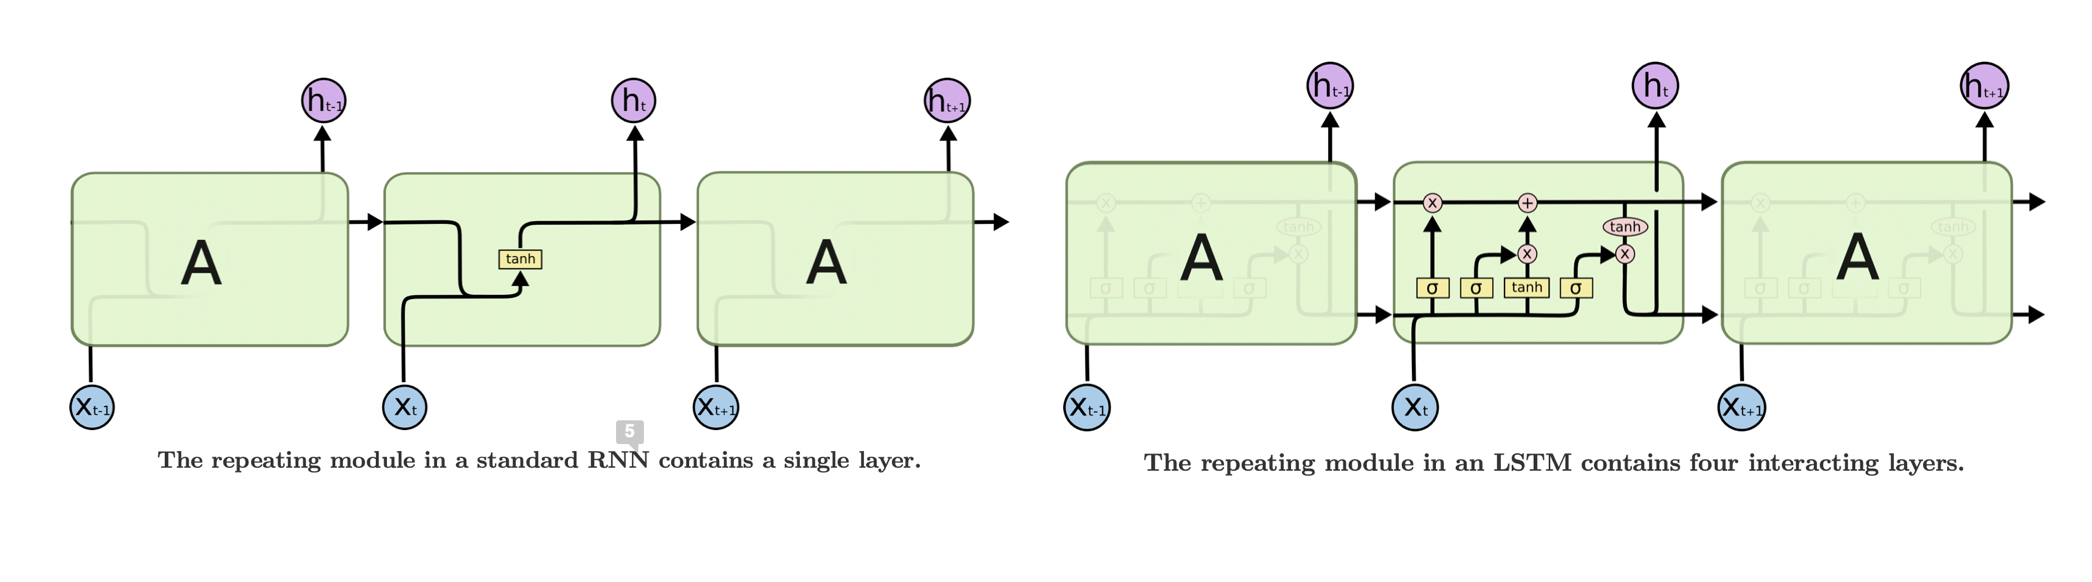

Recurrent neural networks (RNN), long short-term memory networks(LSTM) and are the popularly approaches used for Sequence Modelling tasks such as machine translation and language modeling. The sequential nature of these RNN based architectures prevents parallelization within training examples. (7)

# 5- Introduction to Attention

In its most generic form, attention could be described as merely an overall level of alertness or ability to engage with surroundings. (1) In Artificial Neural Networks (ANN), The implementation of the attention mechanism relies on the ability to highlight and use the salient parts of the provided information instantly, similar to the human brain. The attention mechanism consists of 3 components:<br><br>
I. A process that "reads" the input raw data.<br>
II.  A list of feature vectors that "store" output of the reader component.<br>
III. A process that “extracts” the content of the storage to sequentially perform a task. (3)<br><br>
The attention mechanism had been introduced initially in the encoder-decoder framework and it stands as the core element of Google’s translate service. (4) The attention mechanism overcomes the shortcomings of the vanilla seq2seq model. It allows to maintain context by providing a way to see different parts of the encoder output during the decode phase. it usually eliminates the vanishing gradient problem, as they provide direct connections between the encoder states and the decoder. This mechanism has improved the performance of machine translation tasks (5).

# 6- Transformer Explained

Transformers are a class of deep learning models that do not use iterations. Instead, use a self-aware mechanism in the representation to find the global dependency between the input and the target. Transformers have become the standard for NLP and excel in a variety of tasks. The Transformer proposed in this paper (2) is a model architecture that draws global dependencies between input and output by relying on attention mechanism. By using a similar approach to RNNs, transformers allow for more parallelization during training by making it faster and more accurate. Transformer follows similar architecture to Encoder-Decoder structure, it stacks self-attention and point-wise by fully connected layers for both the encoder and the decoder. In order to compute a sketch of the sequence, self attention mechanism is relating different states of a single sequence. The following digram represents the model architecture of the Transformer (2):

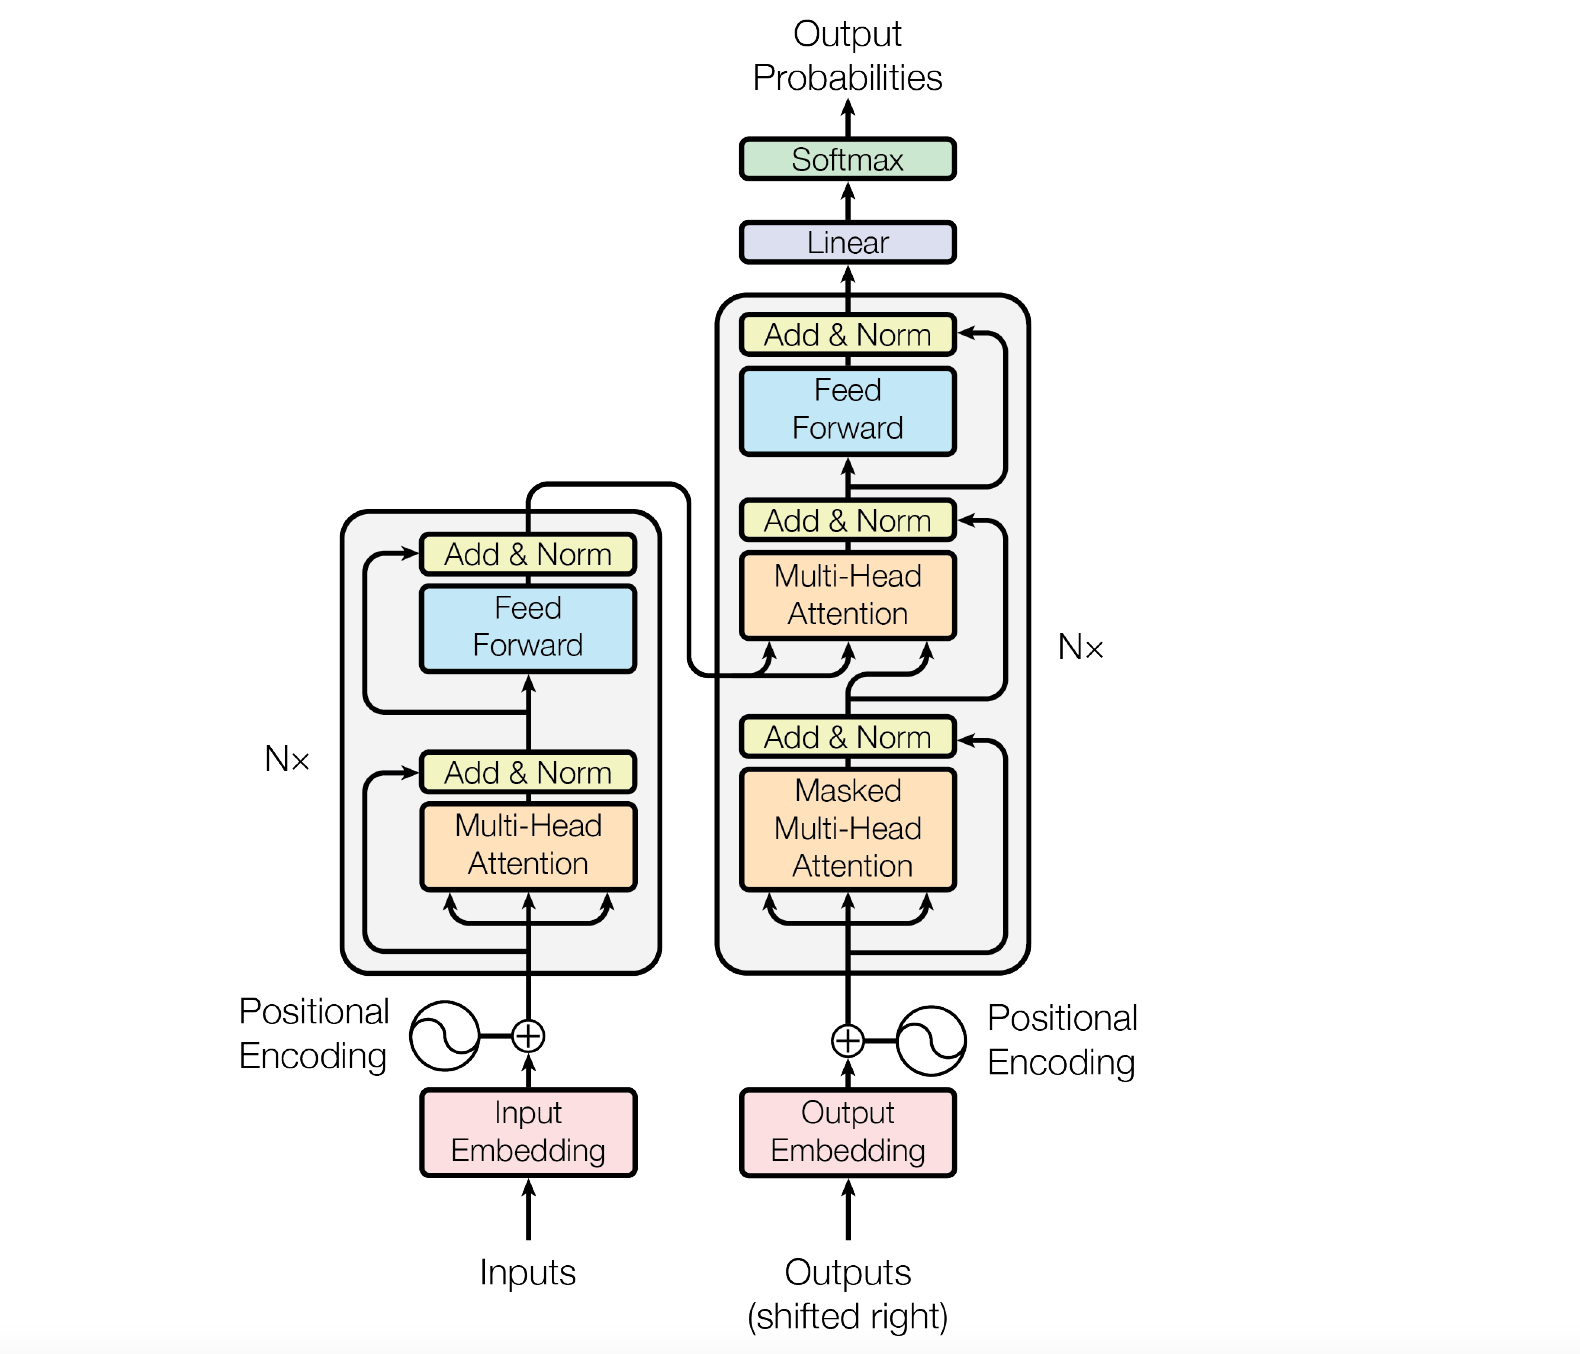

In [ ]:
#Import Libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Reference : https://github.com/jadore801120/attention-is-all-you-need-pytorch
#           https://github.com/JayParks/transformer

In [ ]:
#Define Batches
def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)

The information about relative and absolute position will be injected by using sinusoidal positional encodings that are used to assign order and position to tokens in the sequence:

$$
\begin{aligned}
\text{PE}_{(pos, 2i)} &= \text{sin}(\frac{pos}{10000^{2i/d_{model}}}) \\
\text{PE}_{(pos, 2i + 1)} &= \text{cos}(\frac{pos}{10000^{2i/d_{model}}})
\end{aligned}
$$

where $pos$ is the position and $i$ is the dimension. <br>

In [ ]:
# Create a sinudoid encoder to allow the model to attend relative positions with less effort
def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)


In [ ]:
# From equation below, we create an attention padding mask
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

In [ ]:
# Create Subsequent Mask
def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

An attention function maps a query and a set of key-value pairs to an output. Vectors will include query, keys, values, and output, whcih is calculated as a weighted sum of values, and the weight allocated to each value is computed byy a compatibility function of the query with corresponding key. MultiHeadAttention is a module for attention mechanisms which runs through an attention mechanism several times in parallel:
$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \dots, \text{head}_h) W^O \\
\text{where}\ \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V) \\
W_i^Q \in \mathbb{R}^{\mathrm{d_{model}\times d_k}}, W_i^K \in \mathbb{R}^{\mathrm{d_{model}\times d_k}}, W_i^V \in \mathbb{R}^{\mathrm{d_{model}\times d_v}}, W_i^O \in \mathbb{R}^{\mathrm{hd_v\times d_{model}}}
$$

First, the inputs: query matrix $Q$, key matrix $K$ and value matrix $V$ are linearly projected using $W^Q$, $W^K$ and $W^V$. The projected query $QW^Q$, key $KW^K$ and value $VW^V$ are split into $h$ heads. Scaled dot-product attention is computed for each head $i$. The independent attention head computed are then concatenated and linearly projected using $W^O$.

Multi-Head Attention returns the following:
- `x`: context vector concatenated over all the attention heads
- `attn`: alignment scores (attention weights) over all the attention heads

In [ ]:
# Stack functions of Scaled Dot-Prodcut Attention
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

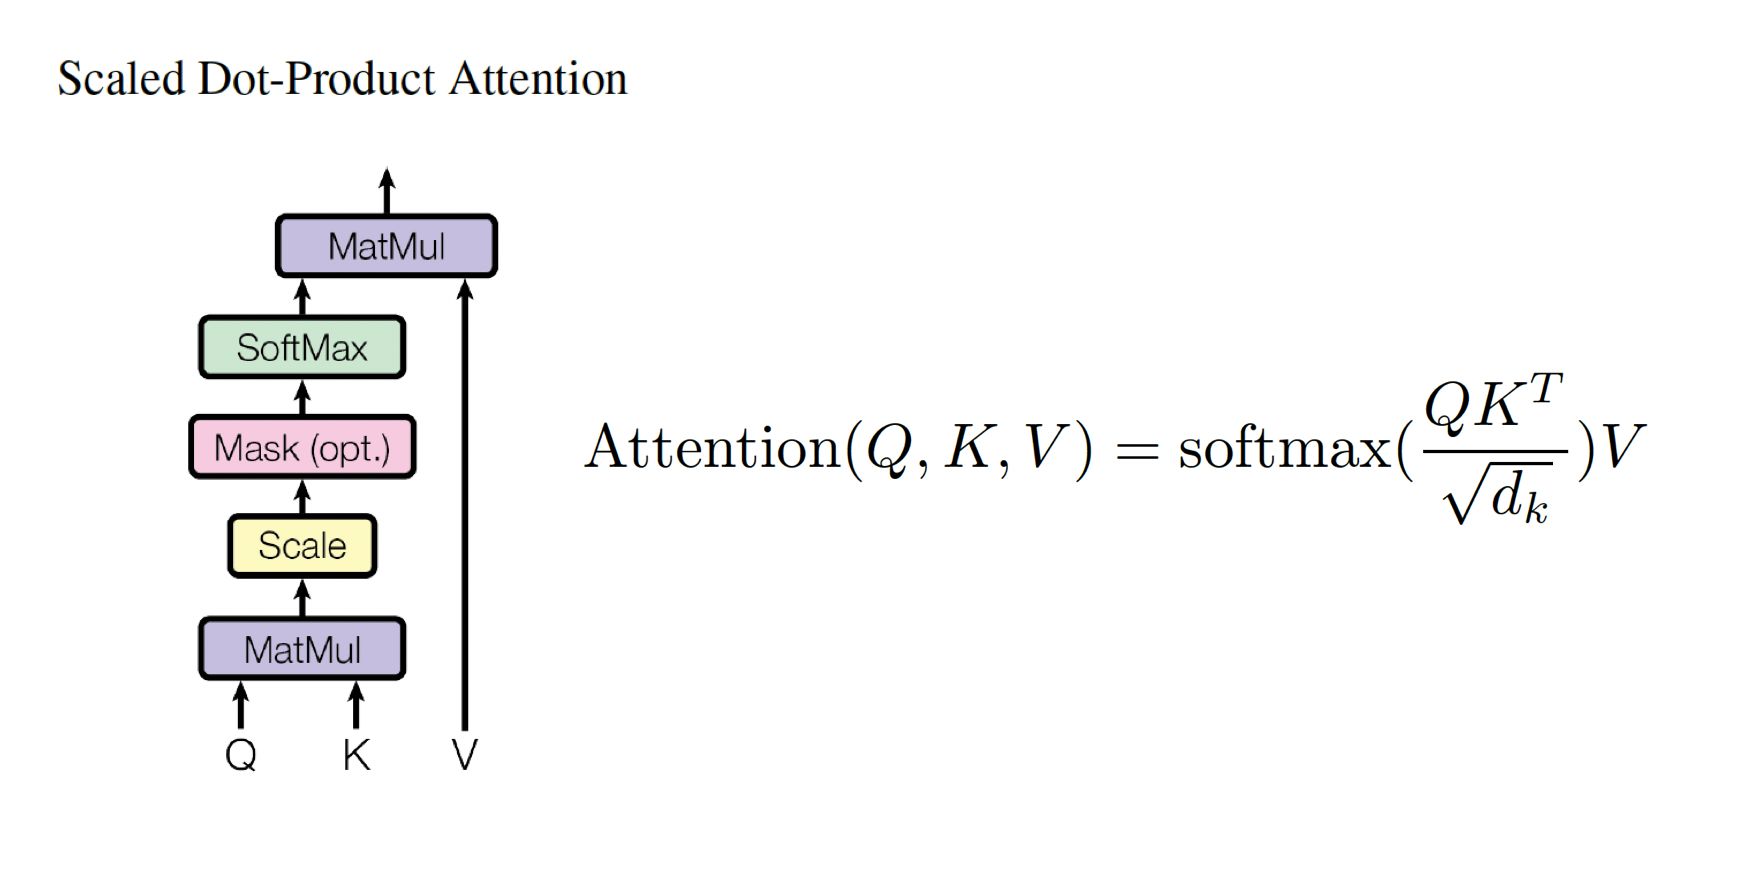

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]

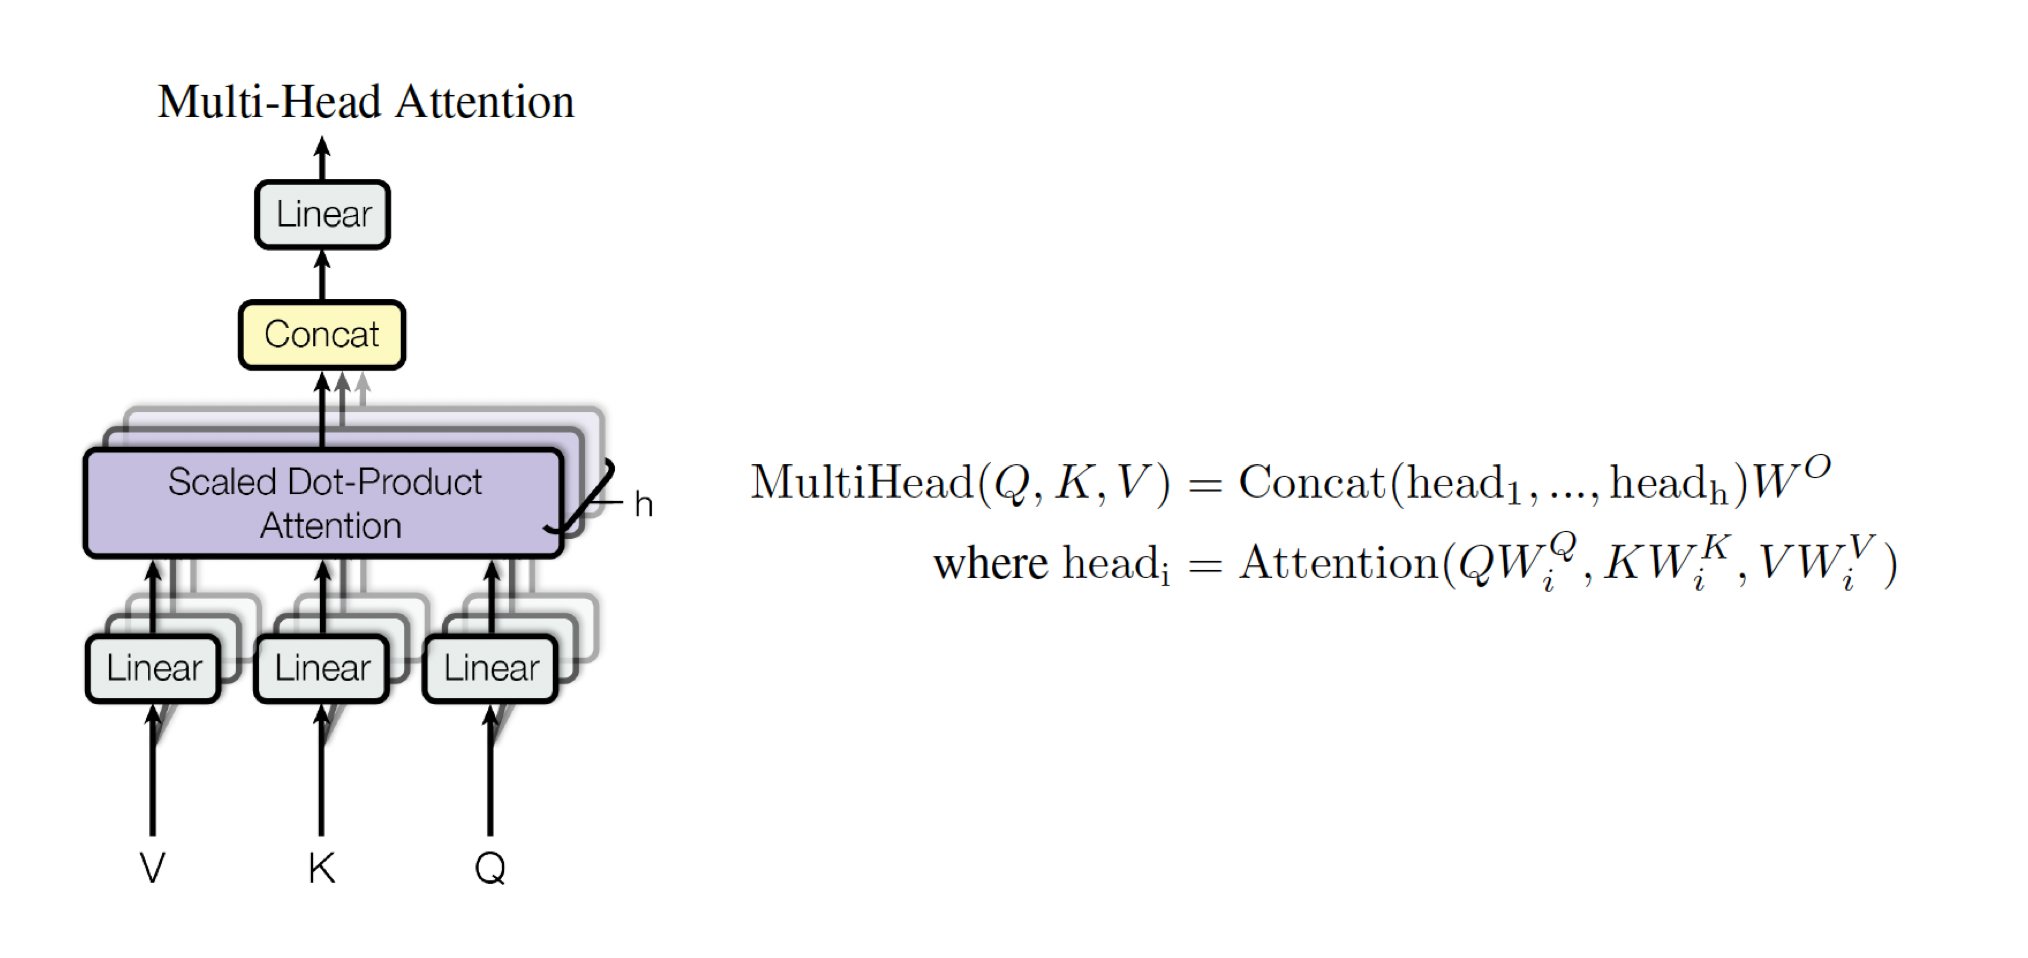

The Positive Wise Feed Forward Network fully connects layers in the enconder and decoder, it is applied to each position independently and in similar manner. This consists of two linear transformations with a ReLU activation in between (2). The same linear transformation is applied across different positions as shown in below formula: <br>
$$
FFN(x) = max(0, xW_1 + b_1)W_2 + b_2
$$ <br>
Position-wise Feed-Forward Network returns the following:
- `x`: non-linearity transformed vector of dimension same as input

In [ ]:
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return self.layer_norm(output + residual)

Encoder is a stack that consists of 6 identical layers, with 2 sub-layers in each. The decoder is a stack of same number of layers. Below digram illustrates the encoder decoder layers: (8)

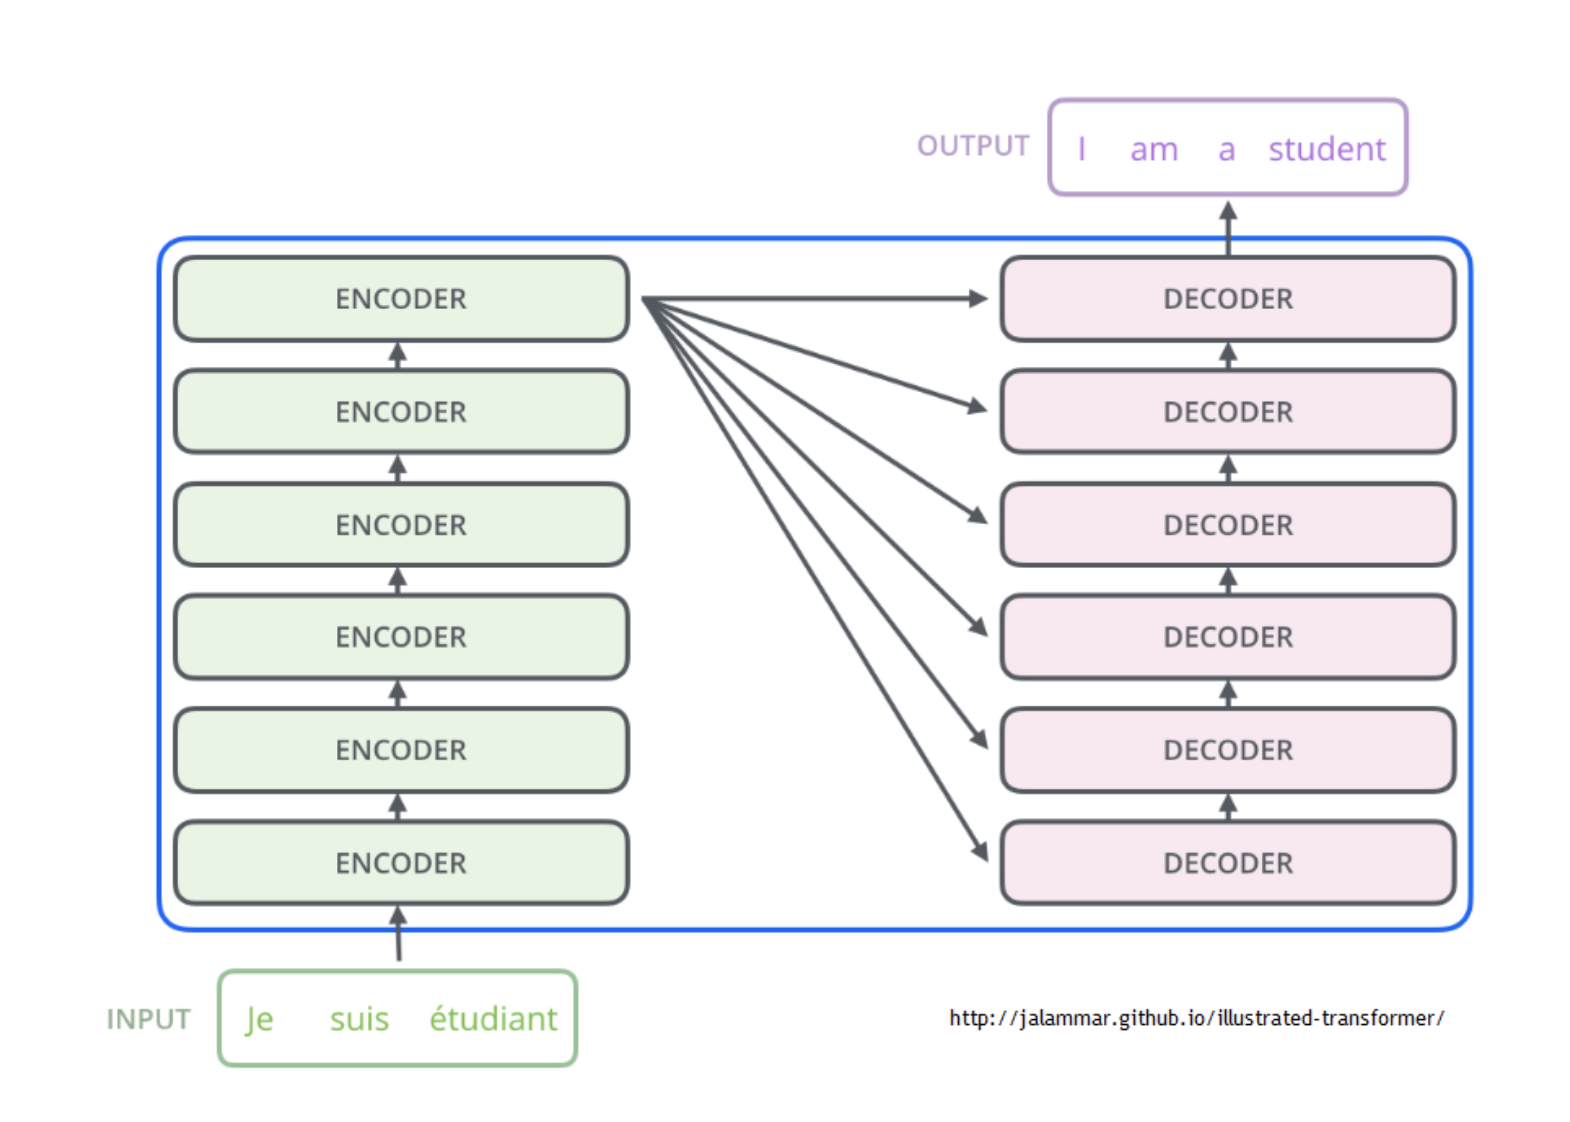

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

In [ ]:
#The queries will go from DecoderLayer to the "encoder-decoder attention" layers
class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

In [ ]:
#The encoder evaluates the degree of relevance of each word with respect to the other words in the sentence to be translate
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

In [ ]:
# The decoder encloses both language interactions, like German and English interactions, to get the relationships with other words in both languages.
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

The input and output sequences are embedded before feeding the sequence into the neural network. Also, positional encoding is added to the embedded sequence, which explains the order in the sequence. Encoder encodes the input sequence and generates encoded representation using self-attention mechanism. The decoder uses this representation along with the sequence generated so far to compute the output sequence.

The Transformer returns the following:
- `output`: output sequence generated
- `attn`: alignment scores (attention weights) between input sequence and output sequence

In [ ]:
#Stacking functions in the algorithm of Transformer
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False)
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns


<img src=https://miro.medium.com/max/1400/1*xW7d7-y0MW5QjtGvyqZN4A.gif>

In [ ]:
def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

Epoch: 0001 cost = 2.049417
Epoch: 0002 cost = 1.434751
Epoch: 0003 cost = 2.420413
Epoch: 0004 cost = 3.716845
Epoch: 0005 cost = 6.071395
Epoch: 0006 cost = 5.908350
Epoch: 0007 cost = 6.699214
Epoch: 0008 cost = 5.139031
Epoch: 0009 cost = 2.642590
Epoch: 0010 cost = 2.124802
Epoch: 0011 cost = 2.233854
Epoch: 0012 cost = 1.887686
Epoch: 0013 cost = 1.752245
Epoch: 0014 cost = 1.847312
Epoch: 0015 cost = 1.851861
Epoch: 0016 cost = 1.744141
Epoch: 0017 cost = 1.641703
Epoch: 0018 cost = 1.576189
Epoch: 0019 cost = 1.553239
Epoch: 0020 cost = 1.569473
ich mochte ein bier P -> ['beer', 'beer', 'beer', 'beer', 'beer']
first head of last state enc_self_attns


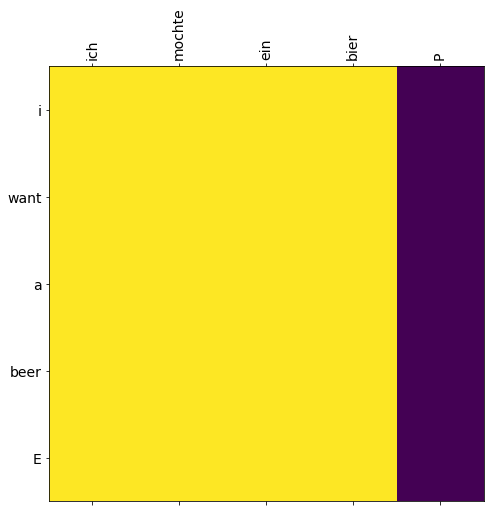

first head of last state dec_self_attns


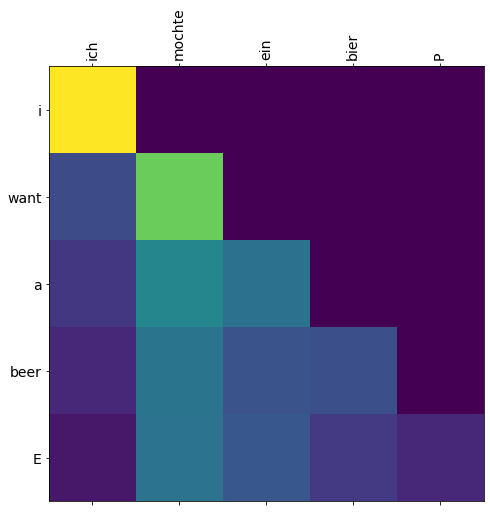

first head of last state dec_enc_attns


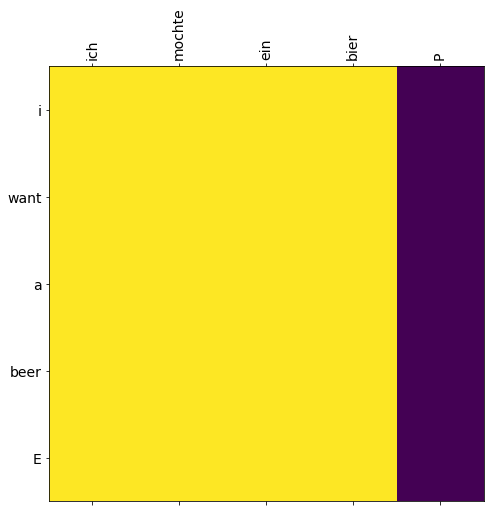

In [ ]:
if __name__ == '__main__':
    sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']

    # Transformer Parameters
    # Padding Should be Zero
    src_vocab = {'P': 0, 'ich': 1, 'mochte': 2, 'ein': 3, 'bier': 4}
    src_vocab_size = len(src_vocab)

    tgt_vocab = {'P': 0, 'i': 1, 'want': 2, 'a': 3, 'beer': 4, 'S': 5, 'E': 6}
    number_dict = {i: w for i, w in enumerate(tgt_vocab)}
    tgt_vocab_size = len(tgt_vocab)

    src_len = 5 # length of source
    tgt_len = 5 # length of target

    d_model = 512  # Embedding Size
    d_ff = 2048  # FeedForward dimension
    d_k = d_v = 64  # dimension of K(=Q), V
    n_layers = 6  # number of Encoder of Decoder Layer
    n_heads = 8  # number of heads in Multi-Head Attention

    model = Transformer()

    criterion = nn.CrossEntropyLoss() #Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001) #Stochastic Gradient 

    enc_inputs, dec_inputs, target_batch = make_batch(sentences)

    for epoch in range(20):
        optimizer.zero_grad()
        outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
        loss = criterion(outputs, target_batch.contiguous().view(-1))
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
        loss.backward()
        optimizer.step()

    # Test
    predict, _, _, _ = model(enc_inputs, dec_inputs)
    predict = predict.data.max(1, keepdim=True)[1]
    print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

    print('first head of last state enc_self_attns')
    showgraph(enc_self_attns)

    print('first head of last state dec_self_attns')
    showgraph(dec_self_attns)

    print('first head of last state dec_enc_attns')
    showgraph(dec_enc_attns)

Encoder attention weights show all words of equal importance. Decoder attention weights show further context awareness for each word when decoded to another language. In this simple case, a one to one mapping of the sequence is shown with attention focusing on most relevant words for each decoded word at time step t.

# 7- Evaluation

This model trains significantly faster than other sequence-to-sequence architectures based on RNN and convolutional layers if a sufficient computational power is available to support the parallelization. 
Also, The attention mechanism could detect relationshps between far items similarly to close items in sequence. The authors claim it outperformed all previously reported ensembles when applying it to both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks. The Transformer achieved better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost as shown in below table (2):



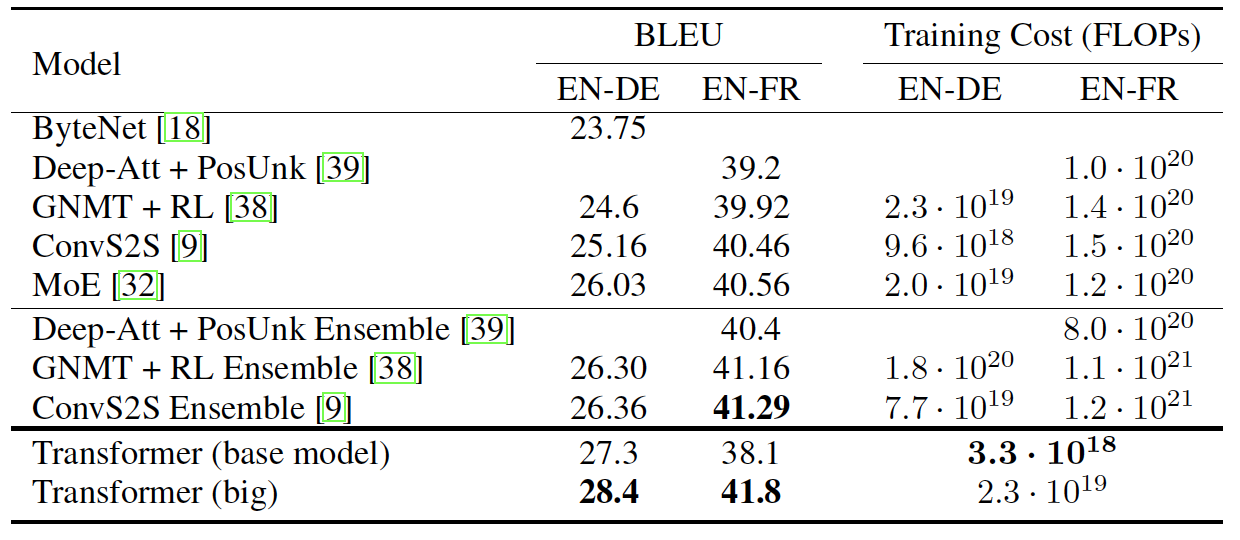

However, there are drawbacks as well. Despite that parallelization makes Transformer computationally efficient, it restricts exploitation in the sequential nature of the input. Instead of accessing the available higher level representations, the access is limited to representations from lower layers (9). Also, Transformers are very large models, so it needs a lot of memory and computes to train and requires a lot of data (8).<br>

In order to overcome the limitations of Transformer architecture, the concept of feedback memory is introduced (9) as mentioned in below diagram: 




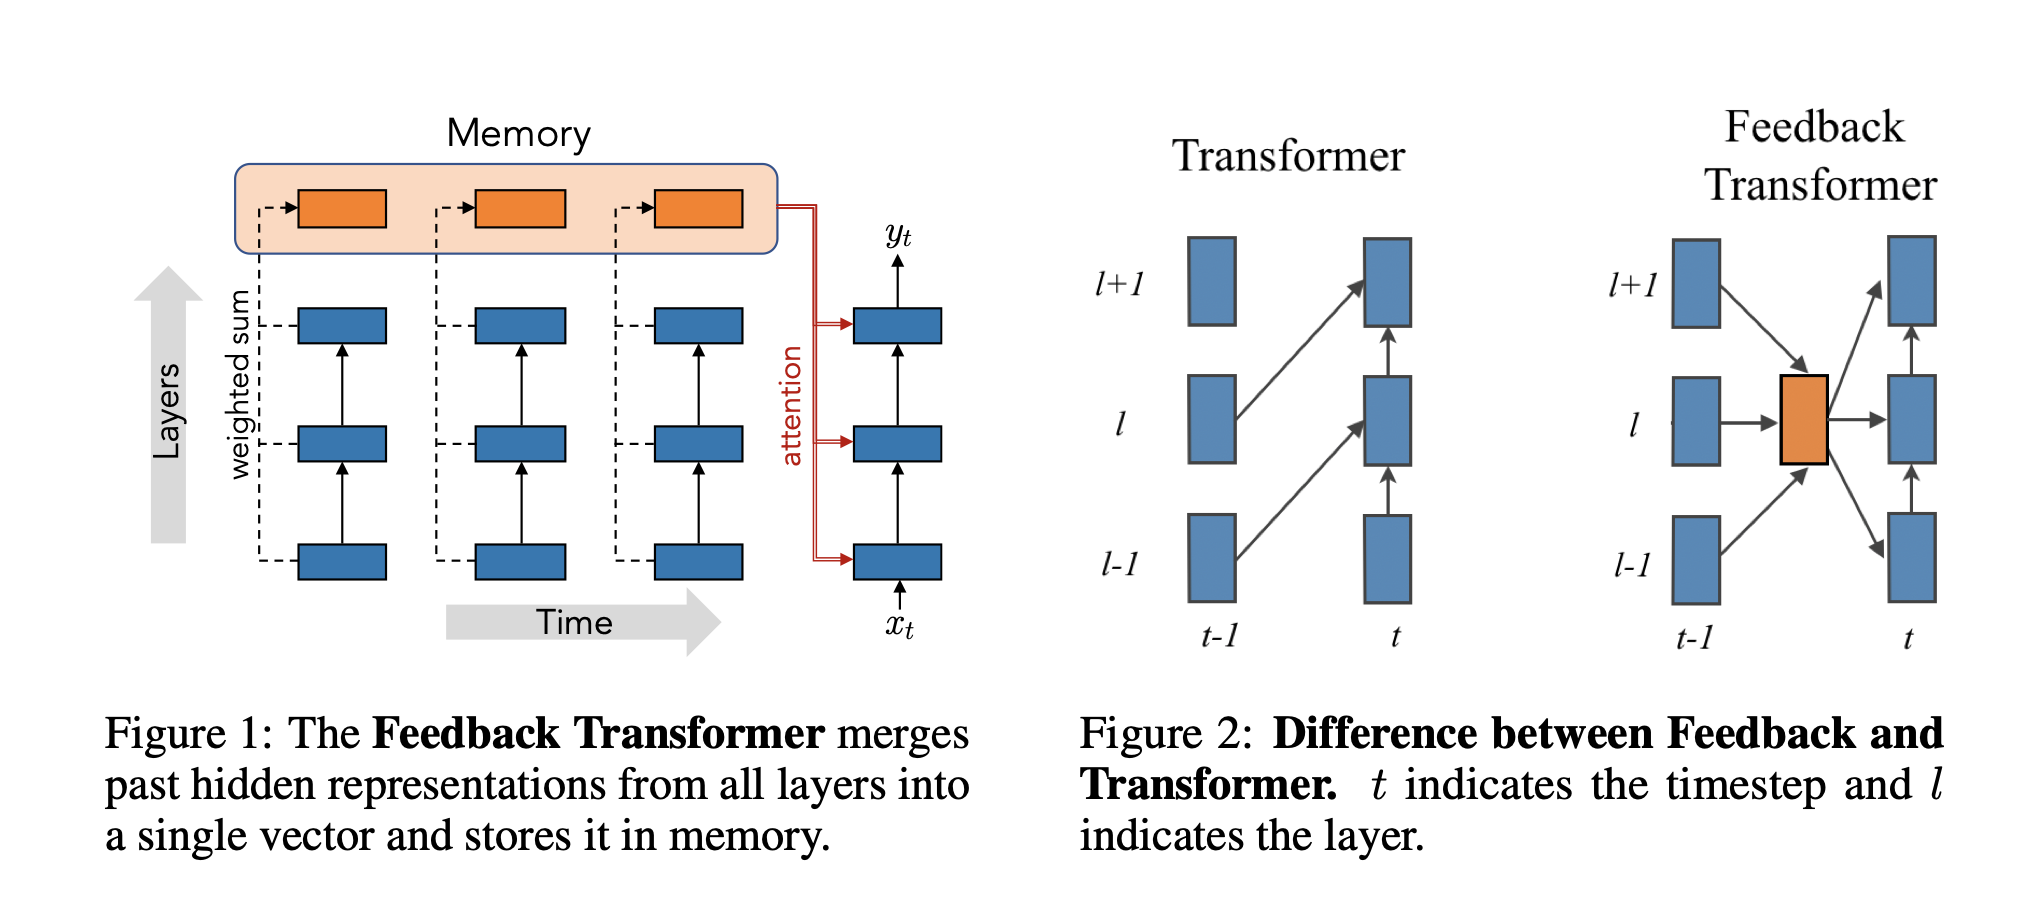

As shown in the above diagram, there are many connections for each hidden representation, and this amount of attentional connections can explode any system. To overcome this, feedback memory consolidates all  information for a particular time step into a single memory representation. Subsequent layers now focus on a single memory representation instead of looking at the individual representations of the previous layer (9).
The paper showed (A) the ability to accomplish better performance with small, shallow models, and (B) convergence to reach higher average reward in reinforcement learning as compared to Transformersas shown in below plot:

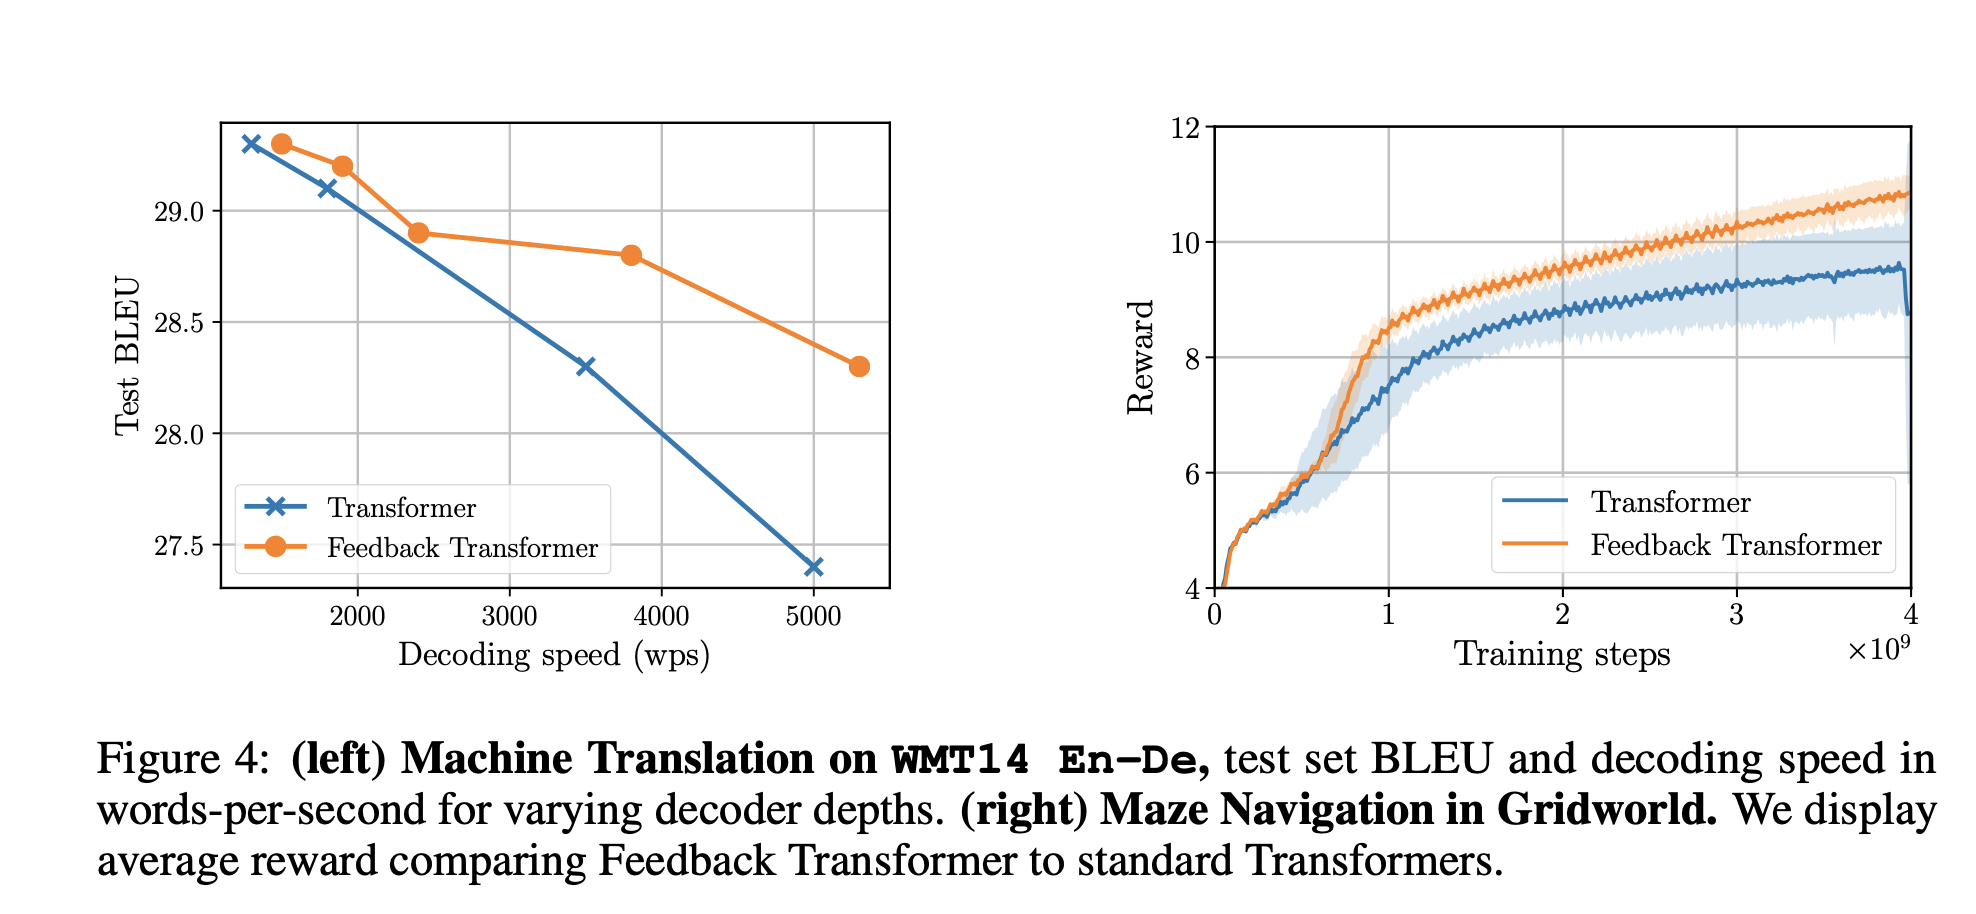

Feedback Transformers achieved stronger performance compared to Transformer achitecture of same size, despite using substantially less memory during the training and inference time (9).

A recent paper Attention is Not All You Need: Pure Attention Loses Rank Doubly Exponentially with Depth (10), introduces a new approach that sheds light on the operation and inductive biases of self-attention networks (SANs). The paper argues that pure attention decays in rank doubly exponentially with respect to depth. The new paper  analyzes SANs via a path decomposition, and it shows SANs as an ensemble of shallow networks. The theory had been verified with experiments on standard transformer architectures.

# 8-References

1. Lindsay G. Attention in Psychology, Neuroscience, and Machine Learning [Internet]. Frontiers. 2022 [cited 2 April 2022]. Available from: https://doi.org/10.3389/fncom.2020.00029

2. Vaswani A, Shazeer N, Parmar N, Uszkoreit J, Jones L, Gomez A et al. Attention is All you Need [Internet]. Papers.nips.cc. 2022 [cited 2 April 2022]. Available from: https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

3. Cristina S. What is Attention? [Internet]. Machine Learning Mastery. 2022 [cited 2 April 2022]. Available from: https://machinelearningmastery.com/what-is-attention/

4. Brownlee J. Encoder-Decoder Recurrent Neural Network Models for Neural Machine Translation [Internet]. Machine Learning Mastery. 2022 [cited 2 April 2022]. Available from: https://machinelearningmastery.com/encoder-decoder-recurrent-neural-network-models-neural-machine-translation/

5. Adaloglou N. How Attention works in Deep Learning: understanding the attention mechanism in sequence models [Internet]. Theaisummer.com. 2022 [cited 2 April 2022]. Available from: https://theaisummer.com/attention/

6. Understanding LSTM Networks -- colah's blog [Internet]. Colah.github.io. 2022 [cited 3 April 2022]. Available from: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

7. Lahoti S. Paper in Two minutes: Attention Is All You Need | Packt Hub [Internet]. Packt Hub. 2022 [cited 2 April 2022]. Available from: https://hub.packtpub.com/paper-in-two-minutes-attention-is-all-you-need/

8. Bouchard L. Introduction to Transformer Networks — How Google Translate works | Attention Is All You Need [Internet]. Medium. 2022 [cited 2 April 2022]. Available from: https://medium.com/what-is-artificial-intelligence/introduction-to-transformer-networks-how-google-translate-works-attention-is-all-you-need-309827c9b942

9. Fan A, Lavril T, Grave E, Joulin A, Sukhbaatar S. Addressing Some Limitations of Transformers with Feedback Memory [Internet]. arXiv.org. 2022 [cited 2 April 2022]. Available from: https://arxiv.org/abs/2002.09402v3

10. Dong Y, Cordonnier J, Loukas A. Attention is not all you need: pure attention loses rank doubly exponentially with depth [Internet]. Proceedings.mlr.press. 2022 [cited 3 April 2022]. Available from: http://proceedings.mlr.press/v139/dong21a/dong21a.pdf